In [1]:
!pip install prophet pandas matplotlib scikit-learn openpyxl

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.1 MB 3.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/12.1 MB 4.1 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/12.1 MB 3.1 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/12.1 MB 2.6 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/12.1 MB 2.4 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/12.1 MB 2.3 MB/s eta 0:00:05
   ---------- ----------------------------- 3.1/12.1 MB 2.2 MB/s eta 0:00:05
   ------------ --------------------------- 3.7/12.1 MB 2.2 MB/s eta 0:00:04
   ------------ --------------------------- 3.9/12.1 MB 2.1 MB/s eta 0:00:04
   -------------- ------------------------- 4.5/12.1 MB 2.1 MB/s eta 0:00:04
   ---------------- ----------------------- 5.0/12.1 MB 2.2 MB/s eta 0:00:04
   ------------------- -------------------- 5.8/12.1 MB 2.3 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

df = pd.read_excel("Superstore.xlsx")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Superstore.xlsx'

In [3]:
import pandas as pd

df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
import pandas as pd

df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Order Date ko datetime me convert
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Daily sales ko group karo
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

daily_sales.head()


,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [6]:
data = daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
data.head()


,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [7]:
from prophet import Prophet

model = Prophet()
model.fit(data)


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
21:04:45 - cmdstanpy - INFO - Chain [1] start processing
21:04:45 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Next 90 days ka forecast
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Last 5 rows dekh ke check karo
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1322,2018-03-26,3010.493716,305.962978,5758.305738
1323,2018-03-27,2362.510258,-352.508367,5130.560922
1324,2018-03-28,1429.372332,-1217.132454,4112.682659
1325,2018-03-29,2562.024228,-118.884718,5332.953912
1326,2018-03-30,2763.838912,203.280803,5793.627016


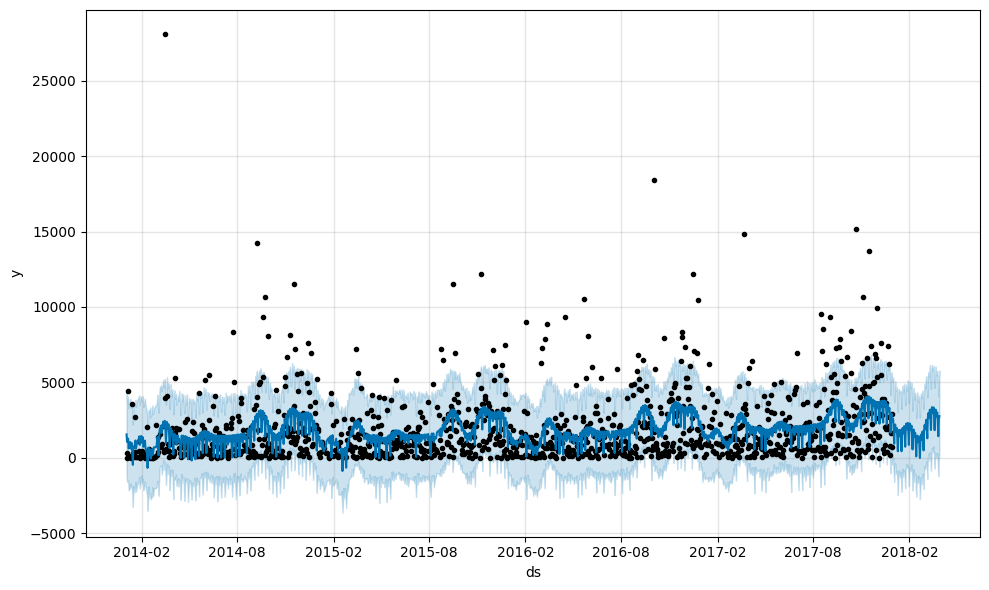

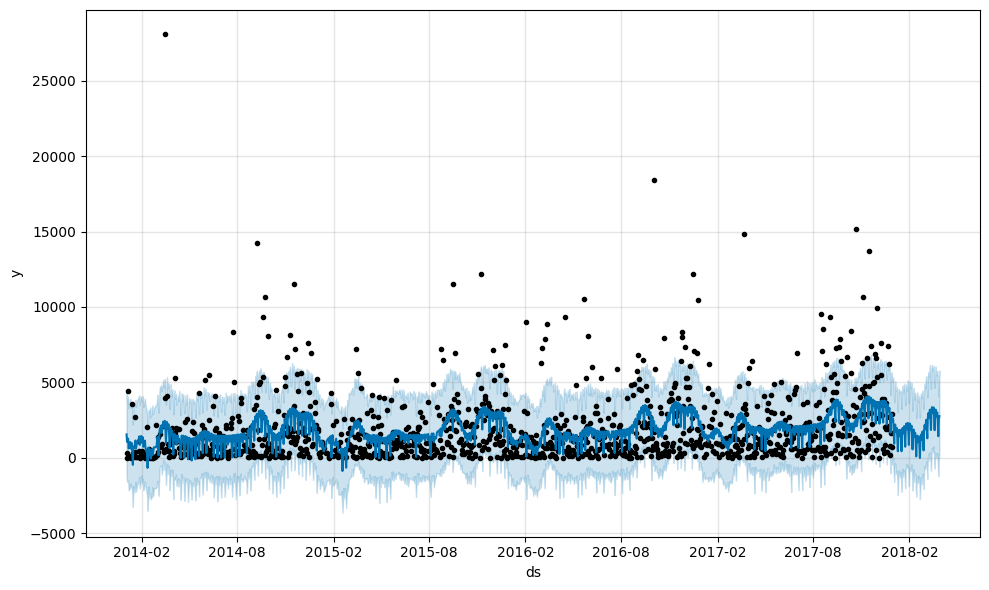

In [9]:
# Forecast plot
model.plot(forecast)


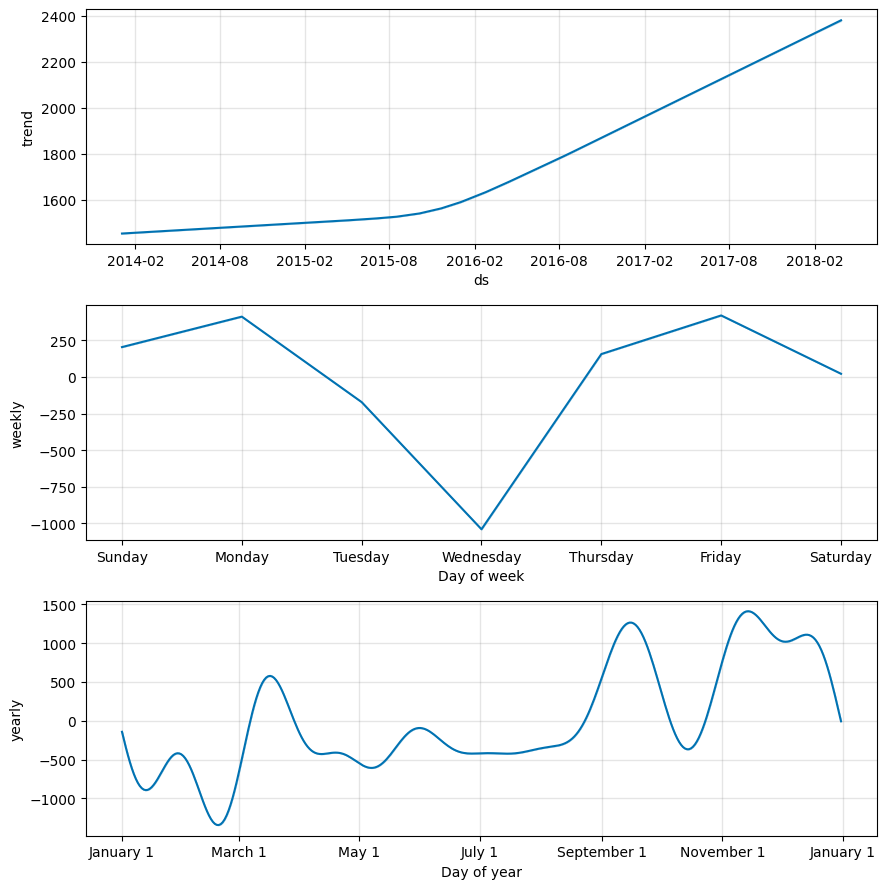

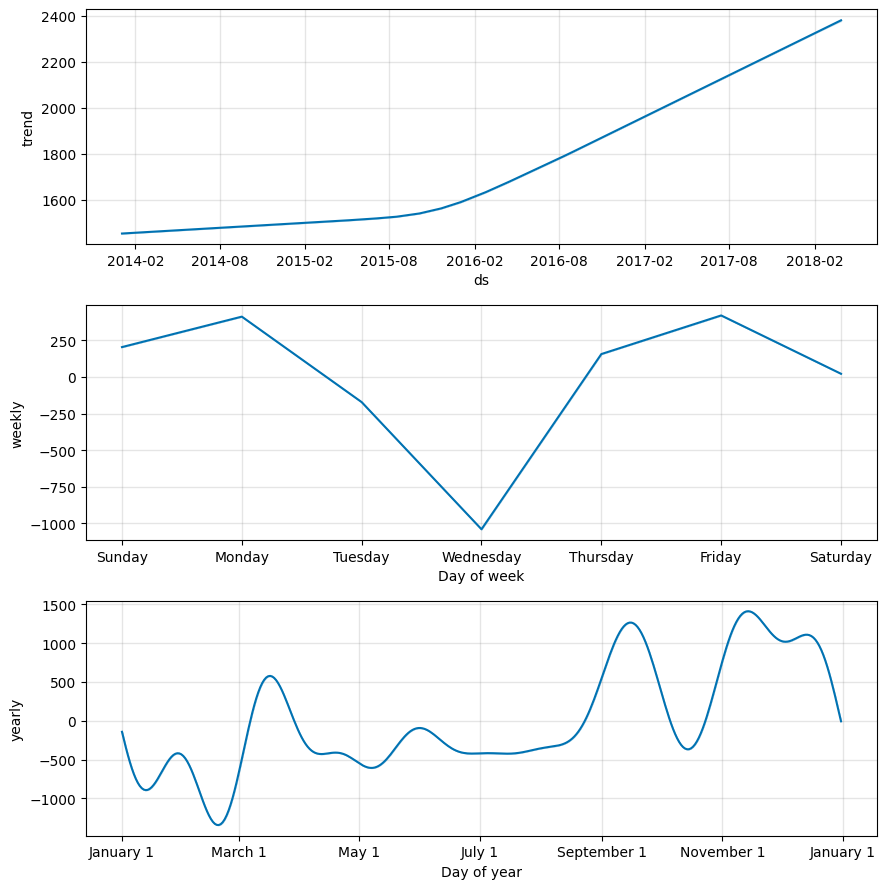

In [10]:
# Seasonality components plot
model.plot_components(forecast)


In [13]:
forecast.to_csv("Superstore_Forecast.csv", index=False)

In [14]:
import os
os.getcwd()


'C:\\Windows\\System32'

In [15]:
import os

# Check current working folder
print("Current folder:", os.getcwd())

# Safe folder me CSV save karo, e.g., Desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
forecast.to_csv(os.path.join(desktop_path, "Superstore_Forecast.csv"), index=False)

print("CSV saved at:", os.path.join(desktop_path, "Superstore_Forecast.csv"))

Current folder: C:\Windows\System32
CSV saved at: C:\Users\Admin\Desktop\Superstore_Forecast.csv
